In [10]:
import scanpy as sc
import anndata as ad
from scib_metrics.benchmark import Benchmarker
from scib_metrics.benchmark import BatchCorrection

import pandas as pd
import numpy as np
import pickle

In [11]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [12]:
PATH = '/projectnb/czproj/Algorithms/ycliu/Pan_proj/outputs/inte_outputs/BMMC/'

path1 = '/projectnb/czproj/Algorithms/ycliu/scDiffusion/outputs/inte_outputs/BMMC/'

In [13]:
adata = sc.read_h5ad(PATH + 'scDiffusion_integration_logDif.h5ad')

adata

AnnData object with n_obs × n_vars = 30669 × 2000
    obs: 'batch', 'labels', 'incoming_counts', 'outgoing_counts'
    var: 'gene_id', 'gene_symbols', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'gnd_state_dict', 'gnd_steps_data', 'gnd_steps_umap', 'graph_diffusion_args', 'hvg', 'integration_edge_index', 'integration_loss_dict_index', 'integration_loss_edge_index_dict', 'labels_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_dif', 'X_fae', 'X_ho', 'X_ho_umap', 'X_umap', 'node_batch_mt'
    obsp: 'connectivities', 'distances'

In [14]:

adata_Harmony = sc.read_h5ad(path1 + 'Harmony_integration.h5ad')

adata_Harmony

AnnData object with n_obs × n_vars = 30669 × 2000
    obs: 'batch', 'labels'
    var: 'gene_id', 'gene_symbols', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'labels_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [15]:
adata.obsm['scDiffusion'] = adata.obsm['X_dif']

adata.obsm['Harmony'] = adata_Harmony.obsm['X_pca_harmony']

adata.obsm['Unintegrated'] = adata_Harmony.obsm['X_pca']

In [16]:
batch_corr = BatchCorrection(pcr_comparison=False)

def evaluate_integration(adata, batch_corr=batch_corr):
    bm = Benchmarker(
        adata,
        batch_key="batch",
        label_key="labels",
        embedding_obsm_keys=['scDiffusion', 'Harmony', 'Unintegrated'],
    
        pre_integrated_embedding_obsm_key='Unintegrated',
        batch_correction_metrics=batch_corr,
        n_jobs=1,
    )
    bm.benchmark()
    
    return bm

In [17]:
bm = evaluate_integration(adata)

Metrics:  60%|██████    | 6/10 [02:22<00:55, 13.85s/it, Batch correction: kbet_per_label]/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metric

/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a

INFO     gdT CD158b+ consists of a single batch or is too small. Skip.                                             


/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)

Metrics:  70%|███████   | 7/10 [03:19<01:24, 28.04s/it, Batch correction: graph_connectivity]/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_graph_connectivity.py:30: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)

Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                           

/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a

INFO     gdT CD158b+ consists of a single batch or is too small. Skip.                                             


/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)

Metrics:  70%|███████   | 7/10 [01:52<00:35, 11.88s/it, Batch correction: graph_connectivity]/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_graph_connectivity.py:30: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)

Metrics:   0%|          | 0/10 [00:00<?, ?it/s]
                                                                                             
Metrics:  60%|██████    | 6/10 [01:31<00:33,  8.27s/it, Batch correction: kbet_per_label]/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning

/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a

INFO     gdT CD158b+ consists of a single batch or is too small. Skip.                                             


/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)

Metrics:  70%|███████   | 7/10 [01:49<00:34, 11.65s/it, Batch correction: graph_connectivity]/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scib_metrics/_graph_connectivity.py:30: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)

Embeddings: 100%|██████████| 3/3 [07:02<00:00, 140.80s/it]tch correction: graph_connectivity]

                                                                                             

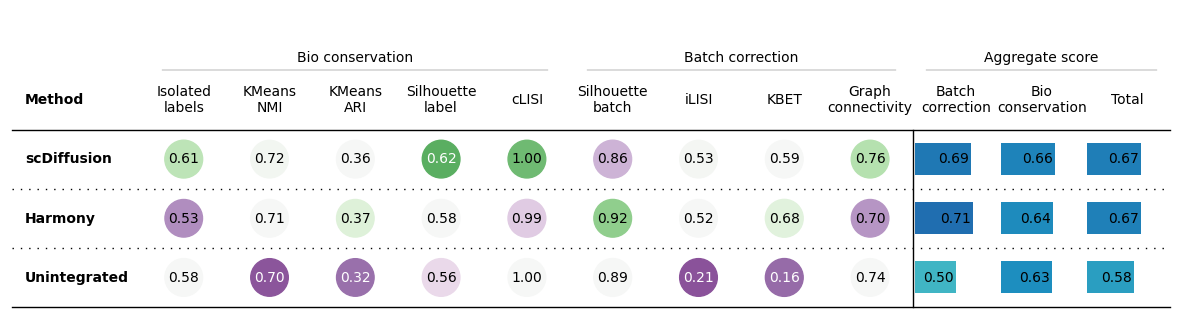

In [18]:
bm.plot_results_table(min_max_scale=False)

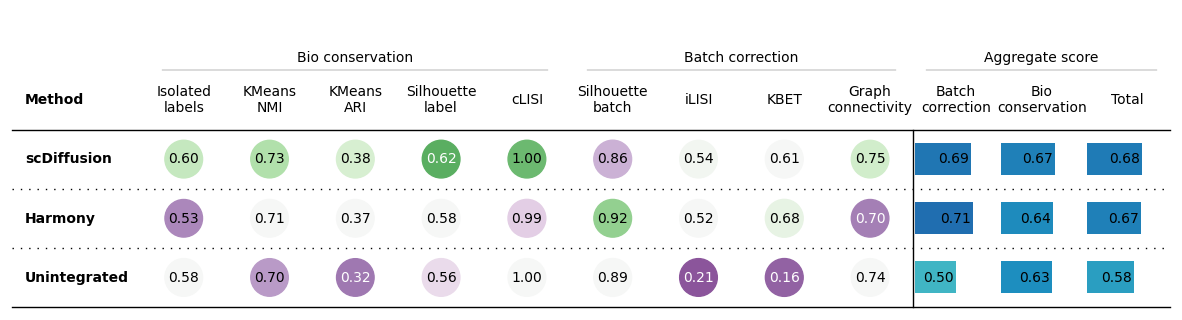

In [9]:
bm.plot_results_table(min_max_scale=False)